In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
plt.rcParams['figure.figsize'] = [15,8]
import warnings
warnings.filterwarnings('ignore')

from xverse.transformer import WOE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report,f1_score,accuracy_score,cohen_kappa_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from scipy import stats


In [141]:
%matplotlib inline

In [2]:
df=pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df = df.replace(to_replace="?",value=np.nan)

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.isnull().sum()/len(df)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [6]:
df_cat=df.select_dtypes(include="O")
df_cat.head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,NaN,Pediatrics-Endocrinology,250.83,NaN,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,NaN,NaN,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,NaN,NaN,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,NaN,NaN,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,NaN,NaN,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
chi = pd.DataFrame(columns=['Feature','P-Value'])
for i in df_cat:
    tab = pd.crosstab(df_cat[i],df['readmitted'])
    g, p, dof, expctd = stats.chi2_contingency(tab, correction=False)
    chi = chi.append({'Feature':i , 'P-Value':round(p,3)},ignore_index=True)
chi

,Feature,P-Value
0,race,0.0
1,gender,0.0
2,age,0.0
3,weight,0.037
4,payer_code,0.0
5,medical_specialty,0.0
6,diag_1,0.0
7,diag_2,0.0
8,diag_3,0.0
9,max_glu_serum,0.0


In [8]:
df_num = df.select_dtypes(include=int)
df_num = df_num.iloc[:,:-1]
df_num

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0
1,149190,55629189,1,1,7,3,59,0,18,0,0,0
2,64410,86047875,1,1,7,2,11,5,13,2,0,1
3,500364,82442376,1,1,7,2,44,1,16,0,0,0
4,16680,42519267,1,1,7,1,51,0,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,0,0
101762,443847782,74694222,1,4,5,5,33,3,18,0,0,1
101763,443854148,41088789,1,1,7,1,53,0,9,1,0,0
101764,443857166,31693671,2,3,7,10,45,2,21,0,0,1


In [9]:
for i in df_num:
    print(stats.shapiro(df_num[i]))

ShapiroResult(statistic=0.9518011212348938, pvalue=0.0)
ShapiroResult(statistic=0.9453345537185669, pvalue=0.0)
ShapiroResult(statistic=0.721352219581604, pvalue=0.0)
ShapiroResult(statistic=0.5689888000488281, pvalue=0.0)
ShapiroResult(statistic=0.7370086908340454, pvalue=0.0)
ShapiroResult(statistic=0.8869138360023499, pvalue=0.0)
ShapiroResult(statistic=0.9848397970199585, pvalue=0.0)
ShapiroResult(statistic=0.7740449905395508, pvalue=0.0)
ShapiroResult(statistic=0.9244065880775452, pvalue=0.0)
ShapiroResult(statistic=0.3123285174369812, pvalue=0.0)
ShapiroResult(statistic=0.19770395755767822, pvalue=0.0)
ShapiroResult(statistic=0.5557276010513306, pvalue=0.0)


In [10]:
kruskal = pd.DataFrame(columns=['Feature','P-Value'])
for i in df_num:
    grp1 = df_num[df['readmitted'] == 0][i] 
    grp2 = df_num[df['readmitted'] == 1][i] 
    f,p = stats.kruskal(grp1,grp2)
    kruskal = kruskal.append({'Feature':i , 'P-Value':round(p,3)},ignore_index=True)
kruskal

,Feature,P-Value
0,encounter_id,NaN
1,patient_nbr,NaN
2,admission_type_id,NaN
3,discharge_disposition_id,NaN
4,admission_source_id,NaN
5,time_in_hospital,NaN
6,num_lab_procedures,NaN
7,num_procedures,NaN
8,num_medications,NaN
9,number_outpatient,NaN


In [11]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
df[df['patient_nbr']==1152]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1164,8380170,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,43,2,13,0,0,1,282,250.01,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
5953,30180318,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,45,4,15,0,0,2,282,794,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
14180,55533660,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,10,NaN,Hematology/Oncology,54,2,19,0,0,1,282,276,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
23623,80742510,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,8,NaN,NaN,30,1,16,0,0,1,282,250,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
24642,83281464,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,12,NaN,Hematology/Oncology,37,1,18,0,0,2,282,287,466,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [13]:
df["readmitted"] = df["readmitted"].replace({"NO":0,"<30":1,">30":0})

In [14]:
df['readmitted'].value_counts(normalize=True)*100

0    88.840084
1    11.159916
Name: readmitted, dtype: float64

In [15]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


In [16]:
df.shape

(101766, 50)

In [17]:
df[df['patient_nbr']==1152]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1164,8380170,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,43,2,13,0,0,1,282,250.01,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
5953,30180318,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,45,4,15,0,0,2,282,794,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
14180,55533660,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,10,NaN,Hematology/Oncology,54,2,19,0,0,1,282,276,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
23623,80742510,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,8,NaN,NaN,30,1,16,0,0,1,282,250,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
24642,83281464,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,12,NaN,Hematology/Oncology,37,1,18,0,0,2,282,287,466,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0


In [18]:
df.isnull().sum()/len(df)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [19]:
df.drop(['weight','payer_code','medical_specialty'],1,inplace=True)

In [20]:
df.shape

(101766, 47)

In [21]:
df.isnull().sum()/len(df)*100

encounter_id                0.000000
patient_nbr                 0.000000
race                        2.233555
gender                      0.000000
age                         0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.020636
diag_2                      0.351787
diag_3                      1.398306
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
g

In [22]:
df['race'].fillna(df['race'].mode()[0],inplace=True)

In [23]:
df.isnull().sum().sum()

1802

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(100244, 47)

In [26]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [27]:
def diagmap(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = 'Other'
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        #data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [28]:
df = diagmap(df,["diag_1","diag_2","diag_3"])

In [29]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

Null values treated

##### Admission source column

In [30]:
adm = {1:"Referral",2:"Referral",3:"Referral",4:"Transfer",5:"Transfer",6:"Transfer",10:"Transfer",18:"Transfer",19:"Transfer",
       22:"Transfer",25:"Transfer",9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",12:"Other",23:"Other",24:"Other",
       15:'Other',17:'Other',20:'Other',21:'Other',7:"Emergency"}
df['admission_source_id'] = df['admission_source_id'].replace(adm)

In [31]:
df['admission_source_id'].value_counts()

Emergency    56799
Referral     30307
Other         6976
Transfer      6162
Name: admission_source_id, dtype: int64

##### Discharge disposition id

In [32]:
ddi = {1:'Home',2:'Discharged_AHC',3:'Discharged_AHC',4:'Discharged_AHC',5:'Discharged_AHC',
       6:'Home_HC',7:'AMA',8:'Home_HC',9:'Discharged_AHC',10:'Discharged_AHC',11:'Hospice/Ex',12:'Home',
       13:'Hospice/Ex',14:'Hospice/Ex',15:'Discharged_AHC',16:'Discharged_AHC',17:'Discharged_AHC',18:'Unknown',
       19:'Hospice/Ex',20:'Hospice/Ex',21:'Hospice/E',22:'Discharged_AHC',23:'Discharged_AHC',24:'Discharged_AHC',
       25:'Unknown',26:'Unknown',27:'Discharged_AHC',28:'Discharged_AHC',29:'Discharged_AHC',30:'Discharged_AHC'}
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(ddi)

In [33]:
df['discharge_disposition_id'].value_counts()

Home              59008
Discharged_AHC    20678
Home_HC           12937
Unknown            4598
Hospice/Ex         2419
AMA                 604
Name: discharge_disposition_id, dtype: int64

Hospice/Expired, readmission doesn't make sense. So, dropping

In [34]:
df = df[~(df['discharge_disposition_id'] == 'Hospice/Ex')]

In [35]:
df.shape

(97825, 47)

In [36]:
df['discharge_disposition_id'].value_counts()

Home              59008
Discharged_AHC    20678
Home_HC           12937
Unknown            4598
AMA                 604
Name: discharge_disposition_id, dtype: int64

##### Admission Type ID

In [37]:
ati = {1:'Emergency',2:'Emergency',3:'Elective',4:'Elective',5:'NA',6:'NA',7:'Emergency',8:'NA'}
df['admission_type_id'] = df['admission_type_id'].replace(ati)

In [38]:
df['admission_type_id'].value_counts()

Emergency    69489
Elective     18355
NA            9981
Name: admission_type_id, dtype: int64

##### Age

In [39]:
df['age'].value_counts()

[70-80)     25161
[60-70)     21865
[50-60)     16849
[80-90)     16328
[40-50)      9396
[30-40)      3605
[90-100)     2582
[20-30)      1507
[10-20)       468
[0-10)         64
Name: age, dtype: int64

In [40]:
df['age'].replace(['[0-10)','[10-20)','[20-30)'],
                 '[0-30)',inplace=True)

In [41]:
df['age'].value_counts()

[70-80)     25161
[60-70)     21865
[50-60)     16849
[80-90)     16328
[40-50)      9396
[30-40)      3605
[90-100)     2582
[0-30)       2039
Name: age, dtype: int64

In [42]:
df['age'].replace(['[0-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],
                 [1,2,3,4,5,6,7,8],inplace=True)

##### Medication changes

In [43]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [48]:
for i,j in zip(medcols,range(1,25)):
    plt.subplot(6,4,j)
    ax = sns.countplot(df[i])
    for k in ax.containers:
        ax.bar_label(k,)
plt.tight_layout()
plt.show()

In [46]:
df.drop(['examide','citoglipton'],1,inplace=True)

In [47]:
medcols = ['metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
           'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
           'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone','metformin-pioglitazone']
len(medcols)

21

In [49]:
for i in medcols:
    df[i] = df[i].replace(['Up','Down','Steady','No'],[1,1,0,0])

In [50]:
df['num_change'] = 0
for i in medcols:
    df['num_change'] = df['num_change'] + df[i]

In [51]:
df['num_change'].value_counts()

0    71217
1    25214
2     1282
3      107
4        5
Name: num_change, dtype: int64

In [52]:
df.drop(medcols,1,inplace=True)

In [53]:
df.shape

(97825, 25)

In [54]:
df['readmitted'] = df['readmitted'].astype('O')

In [55]:
df['readmitted'].value_counts(normalize=True)*100

0    88.543828
1    11.456172
Name: readmitted, dtype: float64

In [56]:
df.sort_values('encounter_id',inplace=True)
df.reset_index(inplace=True,drop=True)

In [57]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,num_change
0,12522,48330783,Caucasian,Female,7,Emergency,Home,Transfer,13,68,2,28,0,0,0,Circulatory,Circulatory,Other,8,None,None,Ch,Yes,0,0
1,15738,63555939,Caucasian,Female,8,Elective,Discharged_AHC,Transfer,12,33,3,18,0,0,0,Circulatory,Neoplasms,Respiratory,8,None,None,Ch,Yes,0,0
2,16680,42519267,Caucasian,Male,3,Emergency,Home,Emergency,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,Ch,Yes,0,0
3,28236,89869032,AfricanAmerican,Female,3,Emergency,Home,Emergency,9,47,2,17,0,0,0,Diabetes,Circulatory,Injury,9,None,None,No,Yes,0,0
4,35754,82637451,Caucasian,Male,4,Emergency,Home,Referral,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,No,Yes,0,0


In [58]:
b = df.drop_duplicates(subset=['patient_nbr'],keep='first')

In [59]:
b['readmitted'].value_counts(normalize=True)*100

0    90.938915
1     9.061085
Name: readmitted, dtype: float64

In [60]:
df = b

In [61]:
df.drop(['encounter_id','patient_nbr'],1,inplace=True)

In [62]:
df['age'] = df['age'].astype('O')

In [63]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,num_change
count,68888.000000,68888.000000,68888.000000,68888.000000,68888.000000,68888.000000,68888.000000,68888.000000,68888.000000
mean,4.301185,42.955507,1.439220,15.774242,0.282865,0.104909,0.180365,7.310519,0.261990
std,2.941849,19.919550,1.763334,8.276728,1.070701,0.514327,0.606146,1.898321,0.476114
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,0.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000,4.000000


In [64]:
df.describe(include='O')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
count,68888,68888,68888,68888,68888,68888,68888,68888,68888,68888,68888,68888,68888,68888
unique,5,3,8,3,5,4,9,9,9,4,4,2,2,2
top,Caucasian,Female,6,Emergency,Home,Emergency,Circulatory,Circulatory,Circulatory,None,None,No,Yes,0
freq,53426,36693,17639,47554,43412,36779,21318,22055,20879,65595,56394,37848,52439,62646


In [65]:
df = pd.get_dummies(data = df, columns= ['race', 'gender', 'admission_type_id','discharge_disposition_id',
                                         'admission_source_id','max_glu_serum',
                                         'A1Cresult', 'change', 'diabetesMed' ], drop_first=True)

In [66]:
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted,num_change,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,admission_type_id_Emergency,admission_type_id_NA,discharge_disposition_id_Discharged_AHC,discharge_disposition_id_Home,discharge_disposition_id_Home_HC,discharge_disposition_id_Unknown,admission_source_id_Other,admission_source_id_Referral,admission_source_id_Transfer,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_No,diabetesMed_Yes
0,7,13,68,2,28,0,0,0,Circulatory,Circulatory,Other,8,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1
1,8,12,33,3,18,0,0,0,Circulatory,Neoplasms,Respiratory,8,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1
2,3,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,3,9,47,2,17,0,0,0,Diabetes,Circulatory,Injury,9,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1
4,4,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1


In [67]:
for i in ['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','num_change']:
    print(i,df[i].skew())

time_in_hospital 1.1662655695653947
num_lab_procedures -0.22022001966349153
num_procedures 1.2130935385665196
num_medications 1.4462504774654215
number_outpatient 9.651995381098626
number_emergency 21.207183110426342
number_inpatient 5.476255359616282
number_diagnoses -0.6339644083985287
num_change 1.6059799711242364


In [68]:
for i in ['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','num_change']:
    print(i,np.sqrt(df[i]).skew())

time_in_hospital 0.4947269836931359
num_lab_procedures -1.1272611564442008
num_procedures 0.3309681989194052
num_medications 0.43019028551174476
number_outpatient 3.098808731552037
number_emergency 4.070314247631805
number_inpatient 2.842384243441988
number_diagnoses -0.8413398392247047
num_change 1.237120468597601


In [69]:
for i in ['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','num_change']:
    print(i,1/(df[i]).skew())

time_in_hospital 0.8574376420737919
num_lab_procedures -4.540913226363597
num_procedures 0.8243387407550398
num_medications 0.6914431597993433
number_outpatient 0.10360551994857838
number_emergency 0.047153834377388765
number_inpatient 0.1826065320792618
number_diagnoses -1.5773756172308186
num_change 0.6226727717531674


In [70]:
for i in ['number_outpatient', 'number_emergency', 'number_inpatient','num_change']:
    df[i] = df[i].replace(0,0.00000000001)
    df[i] = 1/(df[i])
   

In [71]:
for i in ['number_outpatient', 'number_emergency', 'number_inpatient',
          'time_in_hospital', 'num_procedures', 'num_medications']:
    df[i] = np.sqrt(df[i])

In [74]:
xtrain.isnull().sum().head(15)

age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
number_diagnoses      0
num_change            0
race_Asian            0
race_Caucasian        0
dtype: int64

In [73]:
x = df.drop('readmitted',1)
y = df['readmitted']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)

In [993]:
xtrain.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,num_change,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,admission_type_id_Emergency,admission_type_id_NA,discharge_disposition_id_Discharged_AHC,discharge_disposition_id_Home,discharge_disposition_id_Home_HC,discharge_disposition_id_Unknown,admission_source_id_Other,admission_source_id_Referral,admission_source_id_Transfer,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_No,diabetesMed_Yes
53794,3,2.000000,32,1.0,3.741657,316227.766017,316227.766017,316227.766017,Digestive,Circulatory,Diabetes,3,1.000000e+11,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
10726,5,2.236068,46,1.0,3.162278,316227.766017,316227.766017,1.000000,Digestive,Circulatory,Diabetes,6,1.000000e+11,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
53132,6,1.414214,59,0.0,3.162278,316227.766017,316227.766017,316227.766017,Other,Genitourinary,Other,9,1.000000e+11,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1
44718,3,1.414214,39,0.0,2.828427,316227.766017,316227.766017,316227.766017,Digestive,Diabetes,Other,5,1.000000e+00,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
89244,8,2.236068,75,1.0,3.741657,316227.766017,316227.766017,316227.766017,Genitourinary,Genitourinary,Circulatory,9,1.000000e+11,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [75]:
MM = MinMaxScaler()
xtrain.iloc[:,[1,2,3,4,5,6,7,11,12]] = MM.fit_transform(xtrain.iloc[:,[1,2,3,4,5,6,7,11,12]])
xtest.iloc[:,[1,2,3,4,5,6,7,11,12]] = MM.transform(xtest.iloc[:,[1,2,3,4,5,6,7,11,12]])

In [76]:
xtrain.iloc[:,[0,8,9,10]].head()

,age,diag_1,diag_2,diag_3
53794,3,Digestive,Circulatory,Diabetes
10726,5,Digestive,Circulatory,Diabetes
53132,6,Other,Genitourinary,Other
44718,3,Digestive,Diabetes,Other
89244,8,Genitourinary,Genitourinary,Circulatory


In [77]:
xtrain['age'] = xtrain['age'].astype('int64')
xtest['age'] = xtest['age'].astype('int64')

ytrain = ytrain.astype('int64')
ytest = ytest.astype('int64')

In [80]:
from feature_engine.encoding import WoEEncoder, RareLabelEncoder

In [83]:
clf = WoEEncoder()

In [84]:
clf.fit(xtrain.iloc[:,[0,8,9,10]],ytrain)

WoEEncoder()

In [85]:
xtrain.iloc[:,[0,8,9,10]] = clf.transform(xtrain.iloc[:,[0,8,9,10]])
xtest.iloc[:,[0,8,9,10]] = clf.transform(xtest.iloc[:,[0,8,9,10]])

In [86]:
xtrain.isnull().sum().head(15)

age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
number_diagnoses      0
num_change            0
race_Asian            0
race_Caucasian        0
dtype: int64

In [87]:
xtrain.shape

(48221, 36)

In [88]:
xtest.shape

(20667, 36)

### Base Model

In [90]:
kn = KNeighborsClassifier()
kn.fit(xtrain,ytrain)
ypred_tr=kn.predict(xtrain)
ypred = kn.predict(xtest)
#print(classification_report(ytest,ypred))
print("Classificatin Report For Train Data","\n")
print(classification_report(ytrain,ypred_tr),"\n")
print("Classificatin Report For Test Data","\n")
print(classification_report(ytest,ypred))


Classificatin Report For Train Data 

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     43852
           1       0.61      0.07      0.13      4369

    accuracy                           0.91     48221
   macro avg       0.76      0.53      0.54     48221
weighted avg       0.89      0.91      0.88     48221
 

Classificatin Report For Test Data 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18794
           1       0.21      0.03      0.04      1873

    accuracy                           0.90     20667
   macro avg       0.56      0.51      0.50     20667
weighted avg       0.85      0.90      0.87     20667



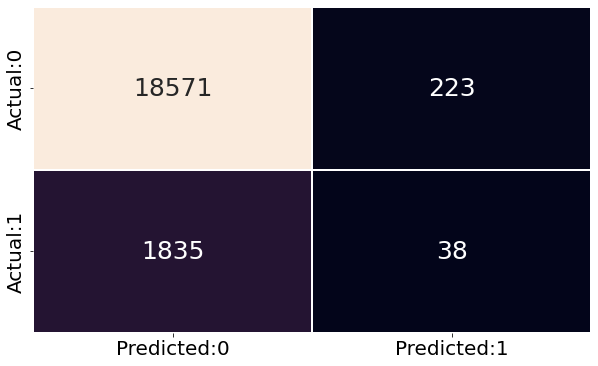

In [1004]:
plt.figure(figsize=[10,6])
cm = confusion_matrix(ytest, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cbar=False,  linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [91]:
from imblearn.over_sampling import SMOTE

In [102]:
x1 = pd.concat((xtrain,xtest),0)
y1 = pd.concat((ytrain,ytest),0)
y1 = y1.astype(int)
sme = SMOTE(sampling_strategy=0.4)
x_sme,y_sme = sme.fit_resample(x1,y1)

In [1007]:
y.value_counts(normalize=True)*100

0    90.938915
1     9.061085
Name: readmitted, dtype: float64

In [1008]:
y.shape

(68888,)

In [1009]:
y_sme.value_counts(normalize=True)*100

0    71.428897
1    28.571103
Name: readmitted, dtype: float64

In [1010]:
y_sme.shape

(87704,)

In [105]:
xtrain_sm,xtest_sm,ytrain_sm,ytest_sm = train_test_split(x_sme,y_sme,test_size=0.25,random_state=10)

### M2

In [1012]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     18794
           1       0.12      0.16      0.14      1873

    accuracy                           0.82     20667
   macro avg       0.52      0.52      0.52     20667
weighted avg       0.84      0.82      0.83     20667



In [140]:
# WITH SMOTE
dt = DecisionTreeClassifier()
dt.fit(xtrain_sm,ytrain_sm)
ypred_t=dt.predict(xtrain_sm)
ypred = dt.predict(xtest_sm)
print("Train Data")
print(classification_report(ytrain_sm,ypred_t),"\n")
print("Test Data")
print(classification_report(ytest_sm,ypred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47083
           1       1.00      0.99      0.99     18695

    accuracy                           1.00     65778
   macro avg       1.00      0.99      1.00     65778
weighted avg       1.00      1.00      1.00     65778
 

Test Data
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     15563
           1       0.74      0.76      0.75      6363

    accuracy                           0.85     21926
   macro avg       0.82      0.83      0.82     21926
weighted avg       0.85      0.85      0.85     21926



### M3

In [93]:
import statsmodels.api as sm

In [94]:
xtrain1 = xtrain.copy()
xtest1 = xtest.copy()
ytrain1 = ytrain.copy()
ytest1 = ytest.copy()
xtrain1 = sm.add_constant(xtrain1)
xtest1 = sm.add_constant(xtest1)
xtrain1.reset_index(inplace=True,drop=True)
xtest1.reset_index(inplace=True,drop=True)
ytrain1.reset_index(inplace=True,drop=True)
ytest1.reset_index(inplace=True,drop=True)
m3=sm.Logit(ytrain1,xtrain1).fit()

         Current function value: 0.293421
         Iterations: 35


D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
print(m3.summary())

                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                48221
Model:                          Logit   Df Residuals:                    48184
Method:                           MLE   Df Model:                           36
Date:                Wed, 29 Jun 2022   Pseudo R-squ.:                 0.03458
Time:                        14:57:16   Log-Likelihood:                -14149.
converged:                      False   LL-Null:                       -14656.
Covariance Type:            nonrobust   LLR p-value:                2.090e-189
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8504      0.293     -6.312      0.000      -2.425      -1.276
age                                         

In [96]:
m3.pvalues[m3.pvalues<0.05]

const                                      2.761116e-10
age                                        2.989809e-02
time_in_hospital                           1.965143e-02
num_lab_procedures                         1.067239e-02
number_emergency                           1.338260e-03
number_inpatient                           6.986796e-58
diag_1                                     7.318146e-08
diag_2                                     2.836819e-04
diag_3                                     3.967412e-03
num_change                                 4.333461e-03
discharge_disposition_id_Discharged_AHC    3.675001e-02
admission_source_id_Transfer               5.081525e-03
diabetesMed_Yes                            7.356654e-06
dtype: float64

In [97]:
sigcols = list(m3.pvalues[m3.pvalues<0.05].index)

In [98]:
sigcols.remove('const')

In [99]:
xtrain = xtrain[sigcols]
xtest = xtest[sigcols]

In [100]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
ypred_te=lr.predict(xtrain)
print("Train Data")
print(classification_report(ytrain,ypred_te),"\n")
print("Test Data")
print(classification_report(ytest,ypred),"\n")

Train Data
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     43852
           1       0.00      0.00      0.00      4369

    accuracy                           0.91     48221
   macro avg       0.45      0.50      0.48     48221
weighted avg       0.83      0.91      0.87     48221
 

Test Data
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18794
           1       0.00      0.00      0.00      1873

    accuracy                           0.91     20667
   macro avg       0.45      0.50      0.48     20667
weighted avg       0.83      0.91      0.87     20667
 



In [106]:
xtrain1 = xtrain_sm.copy()
xtest1 = xtest_sm.copy()
ytrain1 = ytrain_sm.copy()
ytest1 = ytest_sm.copy()
xtrain1 = sm.add_constant(xtrain1)
xtest1 = sm.add_constant(xtest1)
xtrain1.reset_index(inplace=True,drop=True)
xtest1.reset_index(inplace=True,drop=True)
ytrain1.reset_index(inplace=True,drop=True)
ytest1.reset_index(inplace=True,drop=True)
m3=sm.Logit(ytrain1,xtrain1).fit()

Optimization terminated successfully.
         Current function value: 0.575109
         Iterations 5


In [107]:
print(m3.summary())

                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                65778
Model:                          Logit   Df Residuals:                    65765
Method:                           MLE   Df Model:                           12
Date:                Wed, 29 Jun 2022   Pseudo R-squ.:                 0.03649
Time:                        15:01:08   Log-Likelihood:                -37830.
converged:                       True   LL-Null:                       -39262.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8976      0.057    -15.733      0.000      -1.009      -0.786
age                                         

In [108]:
m3.pvalues[m3.pvalues<0.05]

const                                       9.020232e-56
age                                         2.665669e-13
time_in_hospital                            4.373709e-19
num_lab_procedures                          3.636007e-09
number_emergency                            1.090864e-13
number_inpatient                           2.590214e-142
diag_1                                      1.355802e-27
diag_2                                      5.812082e-13
num_change                                  3.609058e-03
discharge_disposition_id_Discharged_AHC    4.641052e-198
admission_source_id_Transfer                9.882373e-13
diabetesMed_Yes                             4.784226e-12
dtype: float64

In [109]:
sigcols = list(m3.pvalues[m3.pvalues<0.05].index)

In [110]:
sigcols.remove('const')

In [111]:
xtrain_sm1 = xtrain_sm[sigcols]
xtest_sm1 = xtest_sm[sigcols]

In [118]:
len(ytrain_sm),len(xtrain_sm1)

(65778, 65778)

In [123]:
#with SMOTE
lr = LogisticRegression()
lr.fit(xtrain_sm1,ytrain_sm)
ypred = lr.predict(xtest_sm1)
yprd_tt=lr.predict(xtrain_sm1)
print("Train Data")
print(classification_report(ytrain_sm,yprd_tt),"\n")
print("Test Data")
print(classification_report(ytest_sm,ypred))

Train Data
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     47083
           1       0.53      0.06      0.10     18695

    accuracy                           0.72     65778
   macro avg       0.63      0.52      0.47     65778
weighted avg       0.67      0.72      0.62     65778
 

Test Data
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     15563
           1       0.55      0.06      0.10      6363

    accuracy                           0.71     21926
   macro avg       0.63      0.52      0.47     21926
weighted avg       0.67      0.71      0.62     21926



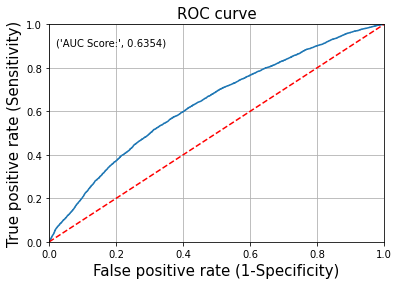

In [142]:
y_pred_prob = lr.predict_proba(xtest_sm1)[:,1]
    
fpr, tpr, thresholds = roc_curve(ytest_sm, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest_sm, y_pred_prob),4)))
plt.grid(True)

In [137]:
fpr, tpr, thresholds = roc_curve(ytest_sm, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.show()
plt.grid(True)

In [135]:
import matplotlib.pyplot as plt

In [136]:
import seaborn as sns

### M4

In [1032]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18794
           1       0.10      0.01      0.03      1873

    accuracy                           0.90     20667
   macro avg       0.50      0.50      0.49     20667
weighted avg       0.84      0.90      0.86     20667



In [1034]:
rf = RandomForestClassifier()
rf.fit(xtrain_sm,ytrain_sm)
ypred = rf.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15563
           1       1.00      0.74      0.85      6363

    accuracy                           0.93     21926
   macro avg       0.95      0.87      0.90     21926
weighted avg       0.93      0.93      0.92     21926



### M5

In [1038]:
tunedparams = {'criterion': ['gini','entropy'],
               'max_depth':[5,10,30,50,120],
               'min_samples_split':[2,6,8],
               'min_samples_leaf':[1,2,5,10]}
gd = GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),param_grid=tunedparams,cv=3,n_jobs=-1,scoring='recall')
gd.fit(xtrain_sm,ytrain_sm)
gd.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [1039]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=50,min_samples_leaf=1,min_samples_split=2,random_state=10)
dt.fit(xtrain_sm,ytrain_sm)
ypred = dt.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     15563
           1       0.73      0.76      0.75      6363

    accuracy                           0.85     21926
   macro avg       0.81      0.82      0.82     21926
weighted avg       0.85      0.85      0.85     21926



### M6

In [1053]:
tunedparams = {'criterion': ['gini','entropy'],
               'n_estimators':[5,20,50,100],
               'max_depth':[5,10,50,80],
               'min_samples_split':[2,6,8],
               'min_samples_leaf':[1,2,5,10]}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=10),param_grid=tunedparams,cv=3,n_jobs=-1,scoring='accuracy')
gd.fit(xtrain_sm,ytrain_sm)
gd.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [1055]:
rf = RandomForestClassifier(criterion='gini',max_depth=50,min_samples_leaf=1,min_samples_split=2,
                            n_estimators=100,random_state=10)
rf.fit(xtrain_sm,ytrain_sm)
ypred = rf.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15563
           1       1.00      0.74      0.85      6363

    accuracy                           0.93     21926
   macro avg       0.95      0.87      0.90     21926
weighted avg       0.93      0.93      0.92     21926



### M7

In [1042]:
from sklearn.naive_bayes import GaussianNB

In [1043]:
gnb = GaussianNB()
gnb_model = gnb.fit(xtrain_sm, ytrain_sm)

In [1044]:
ypred_test= gnb_model.predict(xtest_sm)

In [1046]:
print(classification_report(ytest_sm,ypred_test))

              precision    recall  f1-score   support

           0       0.85      0.05      0.09     15563
           1       0.30      0.98      0.45      6363

    accuracy                           0.32     21926
   macro avg       0.57      0.51      0.27     21926
weighted avg       0.69      0.32      0.20     21926



### M8

In [1047]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier

In [1048]:
ada_model = AdaBoostClassifier()
ada_model.fit(xtrain_sm, ytrain_sm)

AdaBoostClassifier()

In [1050]:
ypred = ada_model.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     15563
           1       0.98      0.62      0.76      6363

    accuracy                           0.89     21926
   macro avg       0.92      0.81      0.84     21926
weighted avg       0.90      0.89      0.88     21926



### M9

In [1052]:
gboost_model = GradientBoostingClassifier()
gboost_model.fit(xtrain_sm, ytrain_sm)
ypred = gboost_model.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     15563
           1       1.00      0.71      0.83      6363

    accuracy                           0.92     21926
   macro avg       0.95      0.86      0.89     21926
weighted avg       0.93      0.92      0.91     21926



### M10

In [1056]:
tunedparams = {'loss' : ['deviance', 'exponential'],
               'n_estimators':[5,20,50,100],
               'learning_rate':[0.001,0.01,0.1,1],
               'min_samples_split':[2,6,8],
               'min_samples_leaf':[1,2]}
gd = GridSearchCV(estimator=GradientBoostingClassifier(random_state=10),param_grid=tunedparams,cv=3,
                  n_jobs=-1,scoring='accuracy')
gd.fit(xtrain_sm,ytrain_sm)
gd.best_params_

{'learning_rate': 1,
 'loss': 'exponential',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 50}

In [1057]:
gboost_model = GradientBoostingClassifier(learning_rate=1,loss='exponential',min_samples_leaf=2,min_samples_split=6,
                                         n_estimators=100,random_state=10)
gboost_model.fit(xtrain_sm, ytrain_sm)
ypred = gboost_model.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15563
           1       0.99      0.75      0.86      6363

    accuracy                           0.93     21926
   macro avg       0.95      0.87      0.90     21926
weighted avg       0.93      0.93      0.92     21926



### M11

In [1059]:
from xgboost import XGBClassifier

In [1060]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]} 
xgb_model = XGBClassifier(random_state=10)
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'accuracy',n_jobs=-1)
xgb_grid.fit(xtrain_sm, ytrain_sm)
xgb_grid.best_params_

{'gamma': 1, 'learning_rate': 0.4, 'max_depth': 4}

In [1062]:
xgb_model = XGBClassifier(gamma=1,learning_rate=0.4,max_depth=4)
xgb_model.fit(xtrain_sm, ytrain_sm)
ypred = xgb_model.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15563
           1       1.00      0.75      0.86      6363

    accuracy                           0.93     21926
   macro avg       0.95      0.88      0.90     21926
weighted avg       0.93      0.93      0.92     21926



### M12

In [1064]:
from sklearn.ensemble import StackingClassifier

In [1092]:
estimators = [('rf', RandomForestClassifier(criterion='gini',max_depth=50,min_samples_leaf=1,min_samples_split=2,
                            n_estimators=100,random_state=10)),
             ('xgb', XGBClassifier(gamma=1,learning_rate=0.4,max_depth=4))]
clf = StackingClassifier(estimators=estimators, final_estimator=GaussianNB())
clf.fit(xtrain_sm, ytrain_sm)
ypred = clf.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15563
           1       0.94      0.78      0.85      6363

    accuracy                           0.92     21926
   macro avg       0.93      0.88      0.90     21926
weighted avg       0.92      0.92      0.92     21926



In [1093]:
ypred = clf.predict(xtrain_sm)
print(classification_report(ytrain_sm,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     47083
           1       0.99      1.00      0.99     18695

    accuracy                           1.00     65778
   macro avg       0.99      1.00      1.00     65778
weighted avg       1.00      1.00      1.00     65778



In [1090]:
estimators = [('rf', RandomForestClassifier(criterion='gini',max_depth=50,min_samples_leaf=1,min_samples_split=2,
                            n_estimators=100,random_state=10)),
             ('xgb', XGBClassifier(gamma=1,learning_rate=0.4,max_depth=4))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(xtrain_sm, ytrain_sm)
ypred = clf.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     15563
           1       0.98      0.77      0.86      6363

    accuracy                           0.93     21926
   macro avg       0.95      0.88      0.91     21926
weighted avg       0.93      0.93      0.93     21926



In [1091]:
ypred = clf.predict(xtrain_sm)
print(classification_report(ytrain_sm,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47083
           1       1.00      1.00      1.00     18695

    accuracy                           1.00     65778
   macro avg       1.00      1.00      1.00     65778
weighted avg       1.00      1.00      1.00     65778



In [1088]:
estimators = [('rf', RandomForestClassifier(criterion='gini',max_depth=50,min_samples_leaf=1,min_samples_split=2,
                            n_estimators=100,random_state=10)),
             ('xgb', XGBClassifier(gamma=1,learning_rate=0.4,max_depth=4))]
clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
clf.fit(xtrain_sm, ytrain_sm)
ypred = clf.predict(xtest_sm)
print(classification_report(ytest_sm,ypred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     15563
           1       0.80      0.80      0.80      6363

    accuracy                           0.88     21926
   macro avg       0.86      0.86      0.86     21926
weighted avg       0.88      0.88      0.88     21926



In [1089]:
ypred = clf.predict(xtrain_sm)
print(classification_report(ytrain_sm,ypred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     47083
           1       0.91      1.00      0.95     18695

    accuracy                           0.97     65778
   macro avg       0.96      0.98      0.97     65778
weighted avg       0.97      0.97      0.97     65778



In [1083]:
raf = pd.DataFrame()
raf['features'] = xtrain_sm.columns
raf['imp'] = rf.feature_importances_

In [1084]:
raf.sort_values(by='imp',ascending=False,inplace=True)
raf = raf.head(10)

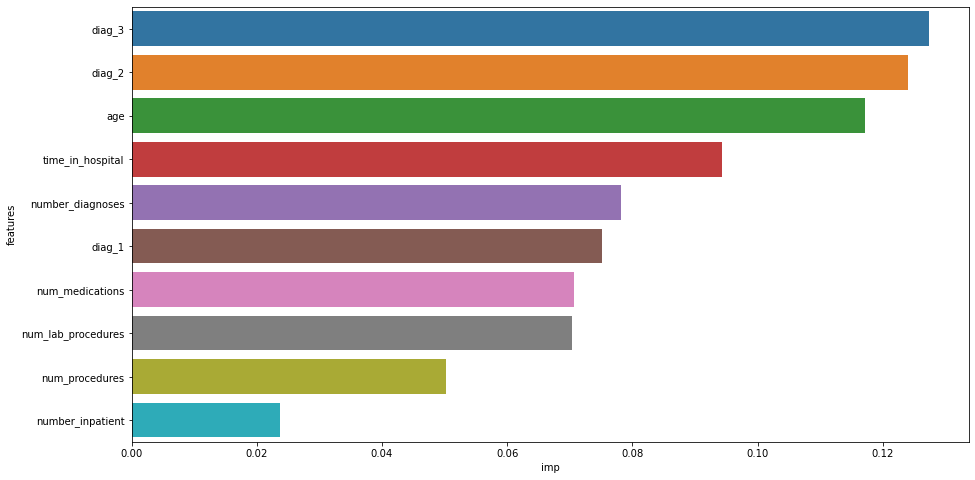

In [1085]:
sns.barplot(y=raf['features'],x=raf['imp'])
plt.show()

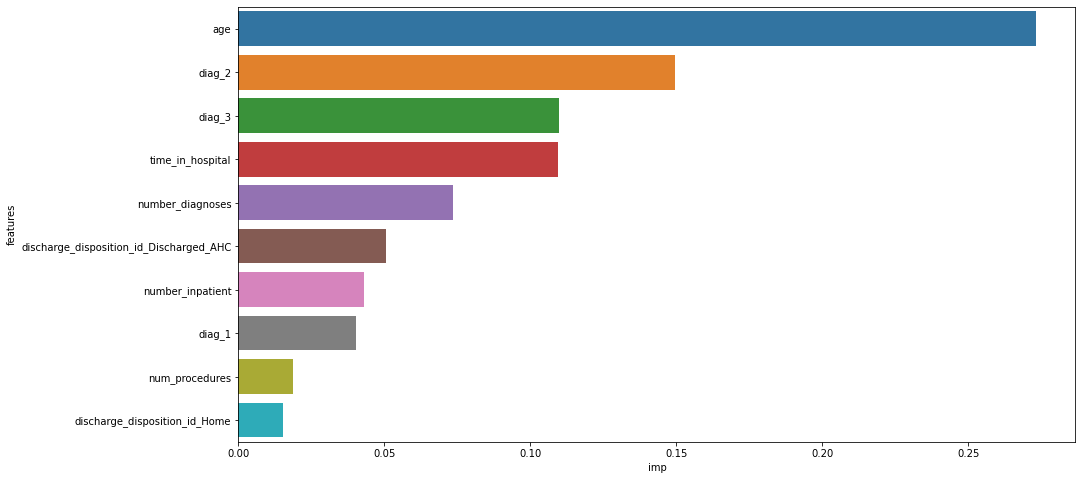

In [1086]:
xgbdf = pd.DataFrame()
xgbdf['features'] = xtrain_sm.columns
xgbdf['imp'] = xgb_model.feature_importances_
xgbdf.sort_values(by='imp',ascending=False,inplace=True)
xgbdf = xgbdf.head(10)
sns.barplot(y=xgbdf['features'],x=xgbdf['imp'])
plt.show()